# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from graphviz import Source
from sklearn.tree import export_graphviz

!pip install graphviz

# Get Data

In [2]:
train_age = pd.read_csv("train.csv", index_col='PassengerId') 
test_age = pd.read_csv("test.csv", index_col='PassengerId') 

In [3]:
titanic = pd.concat([train_age, test_age], sort=True)

In [4]:
titanic.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

# Prepare the Data

In [5]:
titanic.drop('Cabin', axis=1, inplace=True)

In [6]:
titanic = titanic.fillna({"Embarked": "S"})
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)
titanic['Survived'].fillna(titanic['Survived'].median(), inplace=True)

In [7]:
titanic = train_age.drop(['Name','Embarked','Ticket','Cabin'], axis = 1)

In [8]:
sex_mapping = {"male": 0, "female": 1}

In [9]:
titanic['Sex'] = titanic['Sex'].map(sex_mapping)

In [10]:
titanic["Fam_size"] = titanic["SibSp"]+titanic["Parch"] +1

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fam_size
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.9250,1
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,1


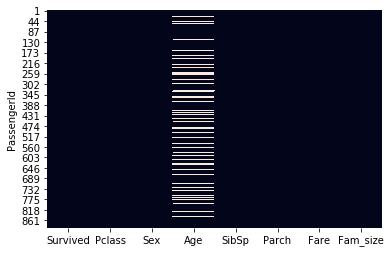

In [12]:
sns.heatmap(titanic.isnull(),cbar=False)

In [13]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fam_size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


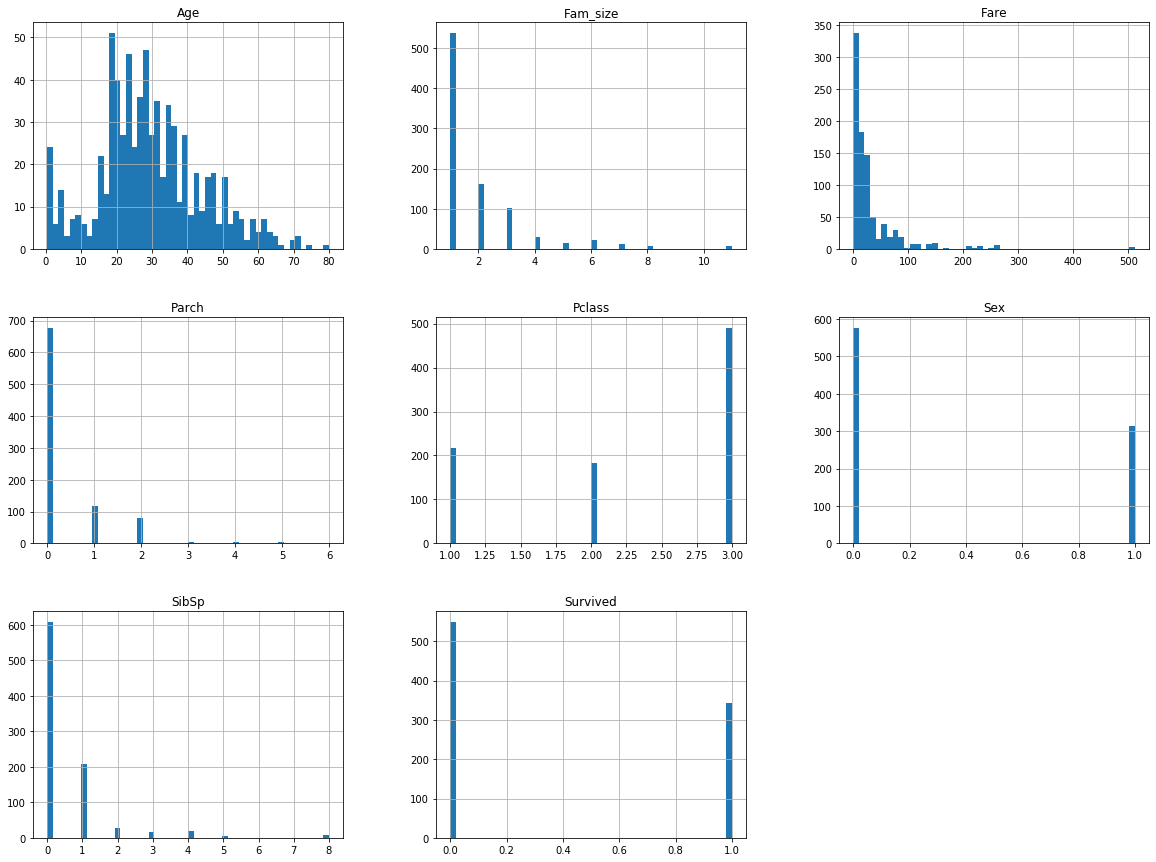

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
# do age and no age then train with the age as a split, only work with age

In [16]:
age_notnull = titanic.dropna()
age_notnull.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fam_size
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.9250,1
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,1


In [17]:
age_isnull = titanic[titanic.isnull().any(axis=1)]
age_isnull.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fam_size
PassengerId,,,,,,,,
6,0,3,0,NaN,0,0,8.4583,1
18,1,2,0,NaN,0,0,13.0000,1
20,1,3,1,NaN,0,0,7.2250,1
27,0,3,0,NaN,0,0,7.2250,1
29,1,3,1,NaN,0,0,7.8792,1


In [28]:
X = age_notnull.drop('Age', axis = 1)
y = age_notnull['Age']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier(random_state = 42)

In [33]:
from sklearn import preprocessing
from sklearn import utils

In [34]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

In [35]:
dtree.fit(X_train, training_scores_encoded)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [36]:
predictions = dtree.predict(X_test)
predictions

array([28,  3, 23, 29, 44,  5, 29,  5, 18, 31, 50, 46, 62, 23, 54,  2, 27,
       56, 28, 50,  9, 31, 40, 33, 24, 24, 34, 53, 60, 24, 24, 61, 45, 27,
       40, 22, 31, 34, 60, 39,  8, 40, 18, 60, 74, 21, 31, 61, 49, 66, 23,
       49, 54, 50, 24, 21, 83,  6, 26, 20, 61, 39, 39, 24, 20, 78, 33, 56,
       40, 49, 24, 49, 22, 75, 24, 40, 20, 39, 26, 46,  6, 54, 24, 24, 23,
       37,  6, 39, 31, 22, 34, 54, 21, 21, 22, 33, 49, 72, 28, 53, 46, 61,
       31, 12, 31, 36, 26, 36, 40, 31, 40, 40,  6, 33, 27,  9, 34, 22, 26,
       26, 28,  5, 29, 26,  6, 23, 24, 37, 26, 61, 26, 40, 15, 21,  6, 25,
       34, 51,  8,  6, 24, 21, 11])

In [37]:
results = pd.DataFrame({
    'actual': y_test,
    'prediction': predictions
})
results

,actual,prediction
PassengerId,,
150,42.0,28
408,3.0,3
54,29.0,23
370,24.0,29
819,43.0,44
...,...,...
820,10.0,8
165,1.0,6
364,35.0,24


# a.	Linear Regression

In [301]:
X = age_notnull[['Fare']].to_numpy()
y = age_notnull[['Age']].to_numpy()

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [304]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [305]:
from sklearn.metrics import mean_squared_error

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

13.719001874669917

In [306]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 13.719001874669917


In [377]:
X_b = np.c_[np.ones((714, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [378]:
theta_best

array([[2.87841968e+01],
       [2.63707629e-02]])

In [379]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[28.78419685],
       [28.83693837]])

In [380]:
X_new

array([[0],
       [2]])

In [381]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [382]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([28.78419685]), array([[0.02637076]]))

# b.	Singular Value Decomposition

In [383]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[2.87841968e+01],
       [2.63707629e-02]])

In [384]:
np.linalg.pinv(X_b).dot(y)

array([[2.87841968e+01],
       [2.63707629e-02]])

# c.	Batch Gradient Descent

In [385]:
X_b.shape

(714, 2)

In [386]:
y.shape

(714, 1)

In [387]:
y.size

714

In [388]:
eta = 0.1  # learning rate
n_iterations = 100
m = 714

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [389]:
theta

array([[1.97767600e+288],
       [2.27981795e+290]])

In [390]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [391]:
X_new_b

array([[1., 0.],
       [1., 2.]])

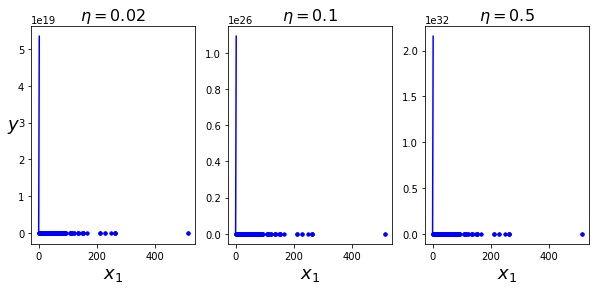

In [392]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

# d.	Stochastic Gradient Descent

In [393]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

/Users/violetkimble/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract


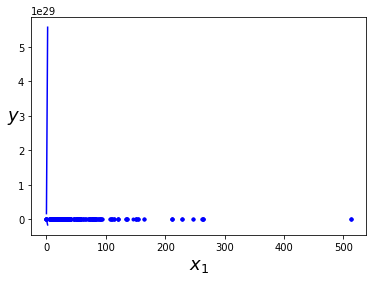

In [394]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                     
            y_predict = X_new_b.dot(theta)            
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)             

plt.plot(X, y, "b.")                             
plt.xlabel("$x_1$", fontsize=18)                   
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.show()                                           

In [395]:
theta

array([[nan],
       [nan]])

In [396]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [397]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-2.65754868e+11]), array([4.53708888e+11]))

# e.	Mini-batch Gradient Descent

In [398]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

/Users/violetkimble/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


In [399]:
theta

array([[nan],
       [nan]])

In [400]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

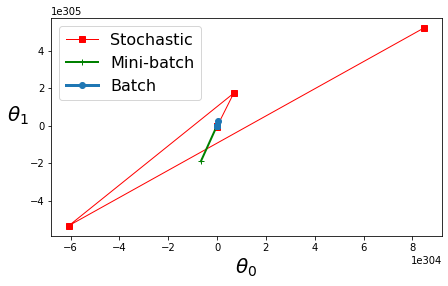

In [401]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()